# Планирование экспериментов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#&quot;Проклятие-размерности&quot;-и-как-его-избежать" data-toc-modified-id="&quot;Проклятие-размерности&quot;-и-как-его-избежать-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>"Проклятие размерности" и как его избежать</a></span></li><li><span><a href="#Физические-и-численные-эксперименты" data-toc-modified-id="Физические-и-численные-эксперименты-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Физические и численные эксперименты</a></span></li><li><span><a href="#Проектирование-предварительных-экспериментов-(скрининг)" data-toc-modified-id="Проектирование-предварительных-экспериментов-(скрининг)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проектирование предварительных экспериментов (скрининг)</a></span><ul class="toc-item"><li><span><a href="#Оценка-распределения-элементарных-эффектов" data-toc-modified-id="Оценка-распределения-элементарных-эффектов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Оценка распределения элементарных эффектов</a></span><ul class="toc-item"><li><span><a href="#Весовая-функция-крыла-от-10-переменных" data-toc-modified-id="Весовая-функция-крыла-от-10-переменных-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Весовая функция крыла от 10 переменных</a></span></li></ul></li></ul></li><li><span><a href="#Разработка-плана-по-осуществлению-выборки" data-toc-modified-id="Разработка-плана-по-осуществлению-выборки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разработка плана по осуществлению выборки</a></span><ul class="toc-item"><li><span><a href="#Стратификация" data-toc-modified-id="Стратификация-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стратификация</a></span></li><li><span><a href="#Латинские-квадраты-и-случайные-Латинские-гиперкубы" data-toc-modified-id="Латинские-квадраты-и-случайные-Латинские-гиперкубы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Латинские квадраты и случайные Латинские гиперкубы</a></span></li><li><span><a href="#Латинские-гиперкубы,-заполняющие-пространство" data-toc-modified-id="Латинские-гиперкубы,-заполняющие-пространство-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Латинские гиперкубы, <em>заполняющие пространство</em></a></span><ul class="toc-item"><li><span><a href="#Оптимизация-$\Phi_q$" data-toc-modified-id="Оптимизация-$\Phi_q$-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Оптимизация $\Phi_q$</a></span></li><li><span><a href="#Эволюционное-планирование" data-toc-modified-id="Эволюционное-планирование-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Эволюционное планирование</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Задача инженерного дизайна: построить "суррогатную" модель _f_, которая легко оценивается и имитирует сложное поведение неизвестного объекта __f__

Обозначим $D$ (подмножество k-мерного R-пространства, $D \subseteq R^k$) - так называемую ___область проектирования___, в которой функция f(x) непрерывна. Но мы можем получать только дискретные значения функции f {$x_i$ → $y_i$ = f($x_i$)|i = 1..n}. Это довольно дорогостоящая процедура. Так что наша задача состоит в том, чтобы используя некоторый набор этих дискретных данных (__выборку__), сконструировать приближённую функцию _f_, с помощью которой можно легко (с малыми затратами по времени и памяти) производить предсказания значения функции f для любого __x__ их $D$.

$D$ - область проектирования  
__x__ - проектные переменные  
__f__ - целевая функция  
_f_   - суррогатная модель.  


Большая часть этой книги - способы конструирования _f_ по заданной выборке. За исключением нескольких случаев, для которых уже найдены точные математические решения...  
Некоторым моделям необходимо минимальное число элементов в выборке _n_...

Важно сказать, что сконструированные таким образом функции _f_ по заданной выборке не всегда хорошо обобщаются на всю область $D$. Всё зависит от пришедшей на вход выборки.  
Получение этой выборки не всегда зависит от нас: её могли получить исследуя другие вопросы. Однако далее будет описано, как в случае возможности создания своей собственной выборки сделать такую выборку, которая позволит создать хорошо обобщающую данные суррогатную модель _f_.

## "Проклятие размерности" и как его избежать

Очевидно, чем больше в задаче переменных, тем сложнее будет функция измерения, с помощью которой мы хотим достаточно точно определить местоположение объекта. Заметим, что если некоторый уровень точности определения положения в одномерном пространстве достигается взятием выборки из _n_ позиций, то в _k_-мерном пространстве для достижения такой же точности необходимо взять выборку из _n$^k$_ точек. Это и есть "проклятие размерности". Поэтому важно с самого начала свести количество _проектных переменных k_ к минимуму.  
Задача состоит в том, чтобы среди всех переменных выделить существенные. Но сначала нам нужно сделать несколько общих замечаний о физических и вычислительных экспериментах, двух источниках, которые могут быть использованы для получения целевой функции

## Физические и численные эксперименты

Существуют 3 источника ошибок, из-за которых результаты эксперимента отклоняются от теоретических расчётов:

* __человеческая ошибка__ - осуществляется самим экспериментатором;  
* __систематическая ошибка__ - появляется из-за недостаточного соответствия между теорией и экспериментом;
* __случайная ошибка__ - появляется из-за наличия погрешности измерений.

Главным отличием между последними двумя пунктами является повторяемость. Систематическая составляющая вносит в экспериментальную ошибку всегда одно и то же значение, а случайная - каждый раз будет отличаться, и при большом числе экспериментов она будет принимать как положительные, так и отрицательные значения.  
Численные эксперименты (эксперименты, смоделированные на ЭВМ) также подвержены экспериментальной ошибке, возникающей в результате:

* __человеческая ошибка__ - 'баги' и ошибки в написанном коде, неверное введённые граничные условия при решении ДУЧП (дифференциального уравнения в частных производных) и т.д.;
* __систематическая ошибка__ - например, математическая модель невязкого обтекания тела (аппроксимация, иногда используемая для экономии вычислительного времени) будет недооценивать силы сопротивления, действующие на тело (потому что в течении на самом деле присутствует вязкость). Другой пример - ошибка, вызванная конечностью разрешения численного моделирования (например, ошибка, вызванная малым числом узлов расчётной сетки). Хоть этот тип ошибки может как переоценить значение некоторой величины, так и недооценить, но при повторении эксперимента он сделает точно также.  

Таким образом, разница между физическими и численными экспериментами заключается в том, что на вторые не влияет случайная ошибка - численные эксперименты ___детерминированы___  

__Небольшое замечание:__  
> Физические экспериментаторы часто используют слово *шум*, имея в виду случайную ошибку. Однако в некоторой литературе по численным экспериментам также встречается слово *шум*, которое должно относится к систематическим ошибкам, потому что там нет случайных.  
Чтобы не запутаться, в дальнейшем, когда мы будем говорить об ошибках физических экспериментов, будем писать слово *шум* без кавычек,а когда об ошибках численных экспериментов - будем писать "шум" - в кавычках
>  



## Проектирование предварительных экспериментов (скрининг)

Ранее мы увидели, насколько важно минимизировать число проектных переменных $x_1, x_2, ..., x_k$ перед тем, как мы попытаемся смоделировать целевую функцию __f__. Но как нам добиться такого ___скрининга___ (так мы будем называть этот процесс в дальнейшем), чтобы наш анализ всё ещё имел смысл?  
Дифференцируемость функции __f__ в области проектирования $D$ по каждой переменной: $$\frac{\partial f}{\partial x_i}|_x$$ является важным критерием для классификации:
* если $\frac{\partial f}{\partial x_i}|_x = 0, \forall x \in D$, то переменной x_i можно смело пренебречь,
* если $\frac{\partial f}{\partial x_i}|_x = const \neq 0, \forall x \in D$, то влияние переменной $x_i$ линейно и аддитивно,
* если $\frac{\partial f}{\partial x_i}|_x = g(x_i) \neq const, \forall x \in D$, то $f$ нелинейна по $x_i$,
*  если $\frac{\partial f}{\partial x_i}|_x = g(x_i),\forall x \in D$, где  $g(x_i, x_j, ...) \neq const$, то $f$ нелинейна по $x_i$ и участвует во взаимодействиях с $x_j, ...$  

Приведенная выше классификация является всего лишь терминологической формулировкой, т.к. на практике мы не можем измерить $\frac{\partial f}{\partial x_i}|_x$ во всей области проектирования. Скрининговое исследование - трудная и ресурсоёмкая задача. Однако нет жёсткого правила относительно того, сколько времени должно быть потрачено на скринниг переменных, т.к. это в значительной степени зависит от задачи. Если мы ожидаем, что многими переменными можно будет пренебречь, то тщательное скрининговое исследование может значительно повысить точность последующей "суррогатной" модели. Однако, если есть (инженерные) основания, полагать, что большинство переменных имеют значительное влияние на целевую функцию, то целесообразно сосредоточить усилия на самом моделировании.  
О методах скрининга входных переменных написано много статей (Jones et al., 1998). Их принципы работы варьируются в зависимости от допущений, которые они делают относительно целевой функции и переменных. Здесь мы остановимся на алгоритме, который в 1991 году описал Моррис. Почему мы выбрали именно этот алгоритм? Потому что единственное допущение, которое он делает, заключается в том, что целевая функция детерминирована (это общая особенность для большинства вычислительных моделей).

### Оценка распределения элементарных эффектов

Без ограничения общности предположим, что наша область проектирования $D$ является $k$-мерным единичным кубом, т.е. $D=[0,1]^k$ Это предположение упростит дальнейшие рассуждения.  

Прежде чем приступить к описанию алгоритма Морриса, нам необходимо определить важное статистическое понятие. Ограничим нашу область проектирования $D$ $k$-мерной $p$-уровневой факториальной сеткой, т.е. $x_i \in \{0, \frac{1}{p-1}, \frac{2}{p-1}, ... , 1\}$ для   $i = 1,...,k$. Для зараннее заданного значения  __x__ $\in D$ определим ___элементарное воздействие___ от  $x_i$ $d_i(x)$, равное 
$$d_i(x)=\frac{y(x_1,x_2,...,x_{i-1},x_i+\Delta, x_{i+1},...,x_k)-y(x)}{\Delta},$$  
где $\Delta = \frac{\xi}{p-1}, \xi \in \mathbb{N^*}$ и $x \in D$ такой, что его компоненты $x_i \leq 1-\Delta$

Метод Морриса используется для оценки параметров распределения элементарных воздействий, связанных с каждой переменной. Принцип заключается в том, что большая величина _центральной тенденции_ (мат. ожидания???) указывает на переменную, имеющую сильное влияние на целевую функцию в области проектирования, а большая _мера разброса_ (дисперсии???) указывает на переменную, по которой __f__ не линейна и участвует во взаимодействиях с другими переменными. На практике мы оцениваем выборочное среднее(среднее арифметическое??? $\overline{x} = \frac{1}{n} \sum\limits_{i=1}^n x_i$) и выборочное стандартное отклонение(Среднеквадратичное отклонение ??? $\sigma = \sqrt{D[x]}$) набора значений $d_i(x)$, рассчитанных в различных частях проектного пространства.

Ясно, что желательно сгенерировать предварительный план выборки __X__ так, чтобы каждая оценка целевой функции __f__ участвовала в вычислении двух элементарных воздействий (вместо одного, если бы использовали случайное распределение __x__ и затем добавляли $\Delta$ к одной из его компонент). Также, план выборки должен дать нам вполне конкретное число (например, _r_) элементарных воздействий для каждой переменной

Пусть __B__ является ___матрицей выборки___, т.е. матрицей размерности $k+1 \times k$ состоящей из нулей и единиц с тем свойством, что для каждого столбца $i=\overline{1,k}$ есть две строки __B__, которые отличаются в своей i-ой позиции (далее мы напишем функцию реализующую такую матрицу на Python). Затем мы вычисляем __B__$^*$ - ___случайную ориентацию___ матрицы __B__:
$$B^* = (1_{k+1,1}x^* + (\frac{\Delta}{2})[(2B - 1_{k+1,k})D^* + 1_{k+1,k}])P^*,$$
где $D^*$ - это $k$-мерная диагональная матрица, где каждый элемент равен +1 или -1 с равной вероятностью, $1_{k+1,k}$ - это матрица единиц, $x^*$ - это случайно выбранная точка нашей дискретизированной $p$-уровневой области проектирования (ограниченной по краям $\Delta$, как было сказано ранее) и $P^* (k \times k)$ - это матрица случайной перестановки столбцов, в которой каждый столбец содердит всего одну единицу, а все остальные элементы равны нулю, при этом у любой пары столбцов единицы стоят в разных строках. Далее приведена реализация данного выражения на языке Python  

In [2]:
def randorient(k,p, xi):
    """
    Генерирует случайную ориентацию скрининговой матрицы.

    Вход:
        k - число проектных перемненных
        p - число дискретных уровней в каждой размерности области проектирования
        xi - коэффициент элементарного воздействия(???)

    Выход:
        Bstar - случайная ориентация матрицы
    """
    
    Delta = xi/(p-1)
    m = k+1
    
    # сужение p-уровневой сетки
    xs = np.hstack((np.arange(0, 1-Delta, 1/(p-1)),1-Delta))
    xsl = len(xs)    
    
    #Матрица выборки
    B = np.zeros((k+1,k))
    B[0,:] = np.zeros((1,k))
    B[1:,:] = np.tril(np.ones((k,k)))
    
    #Рандомизация
    
    #k-мерная диагональная матрица, где каждый элемент 
    #равен +1 или -1 с равной вероятностью
    Dstar = np.diag(np.int64(np.round(np.random.rand(k)))*2-1)
    
    #Перестановочная матрица
    Pstar = np.zeros((k,k))
    rp = np.random.permutation(k)
    for i in np.arange(k):
        Pstar[i][rp[i]] = 1
        
    
    #случайно выбранная точка
    xstar = xs[np.int64(np.floor(np.random.rand(k)*xsl))]
    xstar = np.reshape(xstar, (1, k))

    
#   Bstar = np.dot((np.dot(np.ones((m,1)),xstar) + (Delta/2) * (np.dot((2*B - np.ones((m,k))),Dstar) + np.ones(m,k))), Pstar)
#   разобъём вычисления на отдельные действия (удобно при отладке)

    ones_xstar = np.dot(np.ones((m,1)),xstar)
    twoB_minus_ones = 2*B - np.ones((m,k))
    B_ones_Dstar = np.dot(twoB_minus_ones, Dstar)    
    B_Dstar_plus_ones = B_ones_Dstar + np.ones((m,k))
    circle_breakets = ones_xstar + (Delta/2) * B_Dstar_plus_ones

    Bstar = np.dot(circle_breakets, Pstar)

    return Bstar

 Чтобы получить _r_ элементарных воздействий для каждой переменной  план скрининга строится из _r_ случайных ориентаций:
 $$X = \left[\begin{array}{crl} B^*_1\\ B^*_2\\ ... \\ B^*_r \end{array}\right] $$

In [3]:
def screeningplan(k, p , xi, r):
    """
    Генерирует Моррисовский скрининговый план с заданным 
    числом элементарных воздействий для каждой переменной
    
    Вход:
        k - число проектных перемненных
        p - число дискретных уровней в каждой размерности области проектирования
        xi - коэффициент элементарного воздействия(???)
        r - число случайных ориентаций (=число элементарных 
            воздействий на кажду переменную)
    Выход:
        X - скрининговый план внутри к-мерного куба [0,1]^k
    """
    
    X = randorient(k,p,xi)
    for i in np.arange(1, r):
        X = np.append(X, randorient(k,p,xi), axis=0)
    
    return X

Затем мы посчитаем значение функции _f_ для каждой строки $X$. В дальнейшем мы будем хранить эти значения целевой функции в векторе-столбце $t_{r(k+1) \times 1}$. Взяв по одной случайной ориентации за раз, соседние строки из матрицы скринингового плана и соответствующие значения функции f могут быть вставлены в уравнение (2) для получения $k$ элементарных воздействий (по одному для каждой переменной).  
После того как собрана выборка из _r_ элементарных воздейтвий, средние значения выборок и стандартные отклонения выборок могут быть вычислены и представлены на одной и той же диаграмме для сравнения.

In [4]:
def screeningplot(X, Objhandle, Range, xi, p, Labels):
    """
    Генерирует график скрининга переменных элементарных воздействий
    Вход:
        X - скрининговый план внутри к-мерного куба [0,1]^k
        Objhandle - целевая функция
        Range - матрица 2 на к (к - число проектных переменных) нижних(первая строка) 
                и верхних(вторая строка) границ для каждой переменной
        p - число дискретных уровней в каждой размерности области проектирования
        xi - коэффициент элементарного воздействия(???)
        Labels - массив (1 на к) имён переменных
    """
    k = X.shape[1] #число столбцов матрицы X =  число проектных переменных
    r = X.shape[0]//k
    t = []
    
    for i in np.arange(X.shape[0]):
        X[i,:] = Range[0,:] + X[i,:]*(Range[1,:] - Range[0,:])
        t.append(Objhandle(*list(X[i,:])))
    

    F = np.zeros((k,r))
    for i in np.arange(r):
        for j in np.arange(i*(k+1), i*(k+1)+k):
            F[(np.where(X[j,:] - X[j+1,:] != 0))[0].ravel(),i] = (t[j+1] - t[j])/(xi/(p-1))
    
        
    #вычисляем статистические величины
    ssd=[]
    sm=[]
    for i in np.arange(k):
        ssd.append(np.std(F[i,:]))
        sm.append(np.mean(F[i,:]))
        
    size = 10
    plt.figure(figsize=(size,size))
    plt.xlabel('Sample_means', fontsize=16)
    plt.ylabel('Sample_standart_deviations', fontsize=16)
    plt.xlim(min(sm), max(sm))
    plt.ylim(min(ssd), max(ssd))
    
    for i in np.arange(k):
        plt.text(sm[i],ssd[i],Labels[i], fontsize=25)

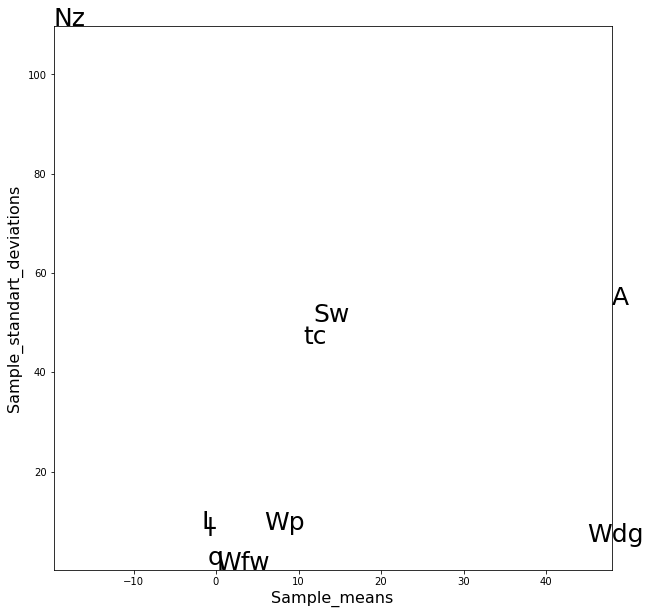

In [5]:
def func(Sw, Wfw, A, L, q, l, tc, Nz, Wdg, Wp):
    W = 0.036 * Sw**0.758 * Wfw**0.0035 * (A / np.cos(L*np.pi/180)**2)**0.6 * q**0.006 * l**0.04 * (100*tc/np.cos(L*np.pi/180))**(-0.3) * (Nz*Wdg)**0.49 + Sw*Wp
    return W

k = 10
p = 50
xi = 1
r = 5
X = screeningplan(k,p,xi,r)
Range = np.array([[150.0, 220.0, 6.0, -10.0, 16.0, 0.5, 0.08, 2.5, 1700.0, 0.025],
                  [200.0, 300.0, 10.0, 10.0, 45.0, 1.0, 0.18, 6.0, 2500.0, 0.08]])
Labels = ['Sw', 'Wfw', 'A', 'L', 'q', 'l', 'tc', 'Nz', 'Wdg', 'Wp']

screeningplot(X, func, Range, xi, p , Labels)

Прежде чем проиллюстрировать процесс примером инженерного проектирования, стоит упомянуть два сценария, где развертывание описанного выше алгоритма требует особой осторожности.  
Во-первых, если размерность k пространства относительно мала и мы можем позволить себе большое значение _r_, то следует иметь в виду повышенную вероятность того, что одна и та же конструкция появится дважды в $X$. Если ответы в точках выборки детерминированы, то, конечно, нет смысла повторять оценку. Эта проблема возникает не особенно часто, так как при скрининге пространств с большими размерностями обычно требуется _большое_ количество элементарных воздействий. 
Во-вторых, программы численного моделирования иногда не возвращают разумный результат из-за ошибок сетки, неспособности решения дифференциального уравнения в частных производных сходиться и т. д. С точки зрения скрининга это важно, поскольку все случайные ориентации $B^*$  будут под угрозой, если вычисление целевой функции не удаётся для одной из точек.  

#### Весовая функция крыла от 10 переменных

Рассмотрим следующее аналитическое выражение, используемое в качестве концептуального уровня оценки веса крыла легкого самолета:
$$W = 0.036S^{0.758}_wW^{0.0035}_{fw}(\frac{A}{cos^2\Lambda})^{0.6}q^{0.006}\lambda^{0.04}(\frac{100tc}{cos\Lambda})^{-0.3}(N_zW_{dg})^{0.49}+S_wW_p.$$

Таблица 1.1 содержит номенклатуру символов, используемых в уравнении (5), а также набор основных значений, приблизительно представляющих самолет Cessna C172 Skyhawk и несколько произвольно выбранный диапазон для каждой переменной. Эти основные значения и диапазоны были использованы для создания заполненного контурного графика весовой функции (см. рис. 1.1) путем попарного изменения входных данных и сохранения оставшихся переменных на базовом значении.

__Таблица 1.1.__  Номенклатура примера задачи скрининга с десятью переменными

| Символ    | Параметр                                            | Основное значение | Мин.знач | Макс.знач |
| ------    | ------------------------                            | ----------------- | -------- | --------- |
| $S_w$     | площадь крыла                                       | 174               | 150      | 200       |
| $W_{fw}$  | вес топлива в крыле                                 | 252               | 220      | 300       |
| $A$       | Соотношение сторон                                  | 7.52              | 6        | 10        |
| $\Lambda$ | Четверть-хордовая развертка (град)                  | 0                 | -10      | 10        |
| $q$       | Скоростной напор???                                 | 34                | 16       | 45        |
| $\lambda$ | Коэффициент конусности                              | 0.672             | 0.5      | 1         |
| $tc$      | Отношение толщины аэродинамического профиля к хорде | 0.12              | 0.08     | 0.18      |
| $N_z$     | Предельный коэффициент нагрузки                     | 3.8               | 2.5      | 6         |
| $W_{dg}$  | Полная масса лётной конструкции                     | 2000              | 1700     | 2500      |
| $W_p$     | Вес краски                                          | 0.064             | 0.025    | 0.08      |


[image 1.1]: ///home/ruslan/Изображения/graph

![](///home/ruslan/Изображения/graph/150x150)

![graph](img/graph.jpg "график")  

__Рис. 1.1.__ Легкий самолет с массой крыла $W$. Каждая плитка показывает контур весовой функции (уравнение (5)) по сравнению с двумя из десяти переменных, а остальные восемь переменных удерживаются на базовом значении

Итак, что же показывает сюжет с точки зрения активности переменных? Как и ожидалось, например, вес на единицу площади поверхности краски $W_p$ не оказывает большого влияния на форму поверхности, тогда как коэффициент нагрузки $N_z$ (который определяет величину максимальной аэродинамической нагрузки на крыло) явно очень активен и участвует во взаимодействии с другими переменными. Классическим примером является взаимодействие с соотношением сторон $A$:  область в верхнем правом углу веса по сравнению с $A$ и $N_z$ указывает на тяжелое крыло для высоких соотношений сторон и больших g-сил (это причина, по которой высоко маневренные истребители не могут иметь очень эффективные, похожие на планеры крылья).  

Однако здесь нас интересует, насколько все это можно было бы предположить просто из незатратного скринингового исследования, без понимания инженерной значимости задействованных переменных (что довольно часто имеет место в инженерном проектировании) и без возможности вычислить такой участок плитки (что почти всегда имеет место в инженерном проектировании – в конце концов, если бы целевая функция _f_ была настолько простой для вычисления, мы бы все равно не думали о суррогатном моделировании).

Итак, что же показывает рисунок 1.2, изображающий результаты скринингового исследования при r = 5? Первое наблюдение, которое мы можем сделать, состоит в том, что существует четко определенная группа переменных, сгруппированных вокруг источника – напомним, что небольшая мера центральной тенденции(мат.ожидания???) является особенностью входных данных с небольшим влиянием на целевую функцию. Действительно, здесь мы видим, что вес краски, как и ожидалось, а также динамическое давление(скоростной напор??) имеют малую меру центральной тенденции. То же самое рассуждение применимо (и подтверждается таблицей 1.1) к коэффициенту конусности и развертке четверти хорды.  

![ssd_sm](img/ssd_sm.png)  
__Рис. 1.2.__ Оценки средних и стандартных отклонений распределений элементарных воздействий каждой из 10 переменных веса крыла в данном примере.

Хотя среднее значение все еще близко к нулю, переменная с наибольшей центральной тенденцией в этой группе - это вес топлива $W_{fw}$. Его выборка элементарных воздействий имеет очень низкое стандартное отклонение и среднее значение немного больше, чем у остальной группы, что указывает на то, что он более важен, чем предыдущие параметры, но не участвует в межпеременных взаимодействиях. График показывает, что $A$ и $tc$ имеют одинаковую важность, а из-за высоких значений стандартного отклонения они имеют нелинейный/интерактивный эффект на целевую функцию.  

Наконец, неудивительно, что большая центральная тенденция и большая мера разброса указывают на то, что $W_{dg}$, $S_w$ и $N_z$ оказывают наиболее значительное влияние на вес крыла. Конечно, авиаконструкторы знают, что общий вес самолета и площадь крыла должны быть сведены к минимуму (последнее обычно диктуется такими ограничениями, как требуемая скорость сваливания, посадочная дистанция, скорость разворота и т. д.) И что требование высокого коэффициента нагрузки $N_z$ приведет к необходимости использования прочных, тяжелых крыльев. На самом деле, именно поэтому мы использовали такую хорошо понятную функцию здесь, чтобы проиллюстрировать работу алгоритма скрининга.  

Мы кратко вернемся к вопросу установления уровня важности (или активности) переменных целевой функции в разделе о моделях Кригинга. А теперь давайте рассмотрим следующий этап процесса моделирования. С помощью активных переменных, идентифицированных (либо с помощью инженерного суждения, либо с помощью систематического скринингового исследования), мы можем теперь спроектировать основной план осуществления выборки в проектном пространстве, определяемом этими переменными. Это послужит основой для данных, на которых будет строиться суррогатная модель.

## Разработка плана по осуществлению выборки

### Стратификация


    Стратификация – это упорядочение объектов системы по уровням  (стратам) с целью создания иерархического описания системы 


Общей особенностью всех аппроксимирующих моделей, рассмотренных в этой книге, является то, что они более точны вблизи точек, в которых мы оценивали целевую функцию. В последующих главах мы познакомимся с законами, определяющими зависимость правильности модели от расстояния до этих точек. Но на данный момент мы просто сделаем интуитивный вывод: для равномерного уровня точности модели необходимо равномерное распределение точек. Такой план выборки называют _заполняющим пространство_.  
Самый простой метод такой выборки - это прямоугольная сетка точек. Это полный факториальный метод, т.е. он подвержен "проклятию размерности".  
Вот упрощённая версия функции на Python, которая должна сгенерировать полный факториальный план выборки в единичном гиперкубе.

In [6]:
def fullfactorial(q, Edges=1):
    """
    Генерирует полный факториальный план выборки в единичном кубе
    
    Вход:
        q - к-мерный вектор, содержащий число точек выборки вдоль
            каждой оси гиперкуба
        Edges - если Edges=1, то точки выборки будут браться на одинаковом
                расстоянии от края до края,
                иначе точки будут браться в центрах ячеек  n = q1*q2*...*qk,
                заполняющих единичный гиперкуб.
    Выход:
        X - полный факториальный план выборки
    """
    if np.min(q) < 2:
        print("Error: в кажом измеренеии должно быть хотя бы две точки")
        print(f"q = {q}")
        return

    #Общее число точек в плане выборки
    n = np.prod(q)
    
    #Число измерений гиперкуба
    k = len(q)
    
    #Выделим место для будущего плана выборки
    X = np.zeros((n, k))
    
    #Вспомогательный элемент
    q = np.append(q, 1)
    
    for j in np.arange(k):
        if Edges == 1:
            one_d_slice = np.hstack((np.arange(0, 1, 1 / (q[j]-1)), 1))
        else:
            one_d_slice = np.hstack((np.array(1 / (2*q[j]), 1, 1 / q[j]),1))
        
        column = np.array([])
        while len(column) < n:
            for l in np.arange(q[j]):
                column = np.concatenate([column, one_d_slice[l] * np.ones((np.prod(q[j+1:])))])
        
        X[:,j] = column
    
    return X

_Пример_ : рассмотрим обычный трёхмерный куб. Пусть (q1,q2,q3) = (3,4,5), тогда имеем следующие сетки по осям:
    1. по первой: [0, 0.5, 1]
    2. по второй: [0, 1/3, 2/3, 1]
    3. по третей: [0, 1/4, 1/2, 3/4, 1]  
    
В итоге полный факториальный план выборки $X$ имеет вид:  

In [7]:
q = np.array([3,4,5])
X = fullfactorial(q)
X

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.25      ],
       [0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.75      ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.25      ],
       [0.        , 0.33333333, 0.5       ],
       [0.        , 0.33333333, 0.75      ],
       [0.        , 0.33333333, 1.        ],
       [0.        , 0.66666667, 0.        ],
       [0.        , 0.66666667, 0.25      ],
       [0.        , 0.66666667, 0.5       ],
       [0.        , 0.66666667, 0.75      ],
       [0.        , 0.66666667, 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.25      ],
       [0.        , 1.        , 0.5       ],
       [0.        , 1.        , 0.75      ],
       [0.        , 1.        , 1.        ],
       [0.5       , 0.        , 0.        ],
       [0.5       , 0.        , 0.25      ],
       [0.

![fullfactorial](img/fullfactorial.bmp)  
__Рис. 1.3.__ Пример трёхмерного полнофакториального плана выборки

Очевидно, что такая конструкция удовлетворяет критерию однородности. Но она имеет два существенных недостатка.
Во-первых, такой план определён только для конструкций определённых размеров, которые могут быть записаны как произведение количеств точек вдоль каждой оси, т.е. $n = q_1 \times q_2 \times ... \times q_k$.  
Во-вторых, при проецировании на оси наборы точек будут перекрываться, и можно утверждать, что выборку для любой отдельной переменной можно улучшить, убедившись, что эти проекции являются как можно более однородными.  
Это может быть сделано путем разбиения диапазона значений этой переменной на относительно большое число ячеек одинакового размера и генерации случайных подвыборок одинакового размера внутри этих ячеек. Этот подход известен как _стратифицированная случайная выборка_. Естественным развитием этой идеи является создание плана выборки, стратифицированного по всем его измерениям. Обычно используют метод _Латинской гиперкубической выборки_.

### Латинские квадраты и случайные Латинские гиперкубы

Как уже было сказано, стратификация плана выборки направлена на создание точек, проекции которых на оси переменных однородны. Прежде чем мы рассмотрим общие методы построения таких планов, стоит рассмотреть случай дискретнозначных переменных в двух измерениях. Такие однородные проекционные планы могут быть сгенерированы довольно легко: если требуется $n$ ???точек измерения???, то квадрат $n \times n$ строится путём заполнения каждого столбца и каждой строки некоторой перестановкий $\{1,2,...,n\}$, то есть каждое число должно только один раз появляться в каждом столбце и в каждой строке. Например, для $n=4$ _Латинский квадрат_ (так обычно называют такие планы выборки) имеет вид:  


![LSQ](img/Latin_Square_n=4.bmp)  

Мы выделили единички (__1__), чтобы проиллюстрировать идею равномерной проекции, но, конечно, мы могли бы выбрать 2, 3 или 4 с тем же успехом. Кроме того, это всего лишь один произвольно выбранный четырехточечный латинский квадрат – мы могли бы с равным успехом выбрать любой из других 575 возможных вариантов. Кстати, число различных латинских квадратов довольно резко возрастает с ростом n; например, существует 108 776 032 459 082 956 800 латинских квадратов восьмого порядка! (Доказательство данного факта предоставлено читателю в качестве упражнения.)

Построение _Латинского гиперкуба_ (многомерного расширения Латинского квадрата) можно сделать аналагичным образом: разделить Область Проектирования на гиперкубы одинакового размера (ячейки) и поместить точки в эти ячейки (по одно точке в ячейку) таким образом, чтобы выполнялось следующее условие. Через каждую точку проведём линии, параллельные осям гиперкуба. Тогда каждая такая линия должна проходить ровно через одну точку. Выполнение данного условия проиллюстрировано на рис. 1.4. для трёхмерного куба  
![LHC3D](img/LatinHiperCube3D.bmp)  
__Рис. 1.4.__ Трёхпеременный десятиточечный план выборки с помощью Латинского гиперкуба. Показан в трёх измерениях(сверху слева) вместе с его двумерными проекциями. Все десять точек видны на каждой из проекций, и каждая строка и столбец ячеек содержит ровно одну точку.

Мы получаем такой план выборки следующим образом. Если $X$ - это матрица $n \times k$, в которой мы хотим записать этот план (каждая строчка обозначает одну точку) то мы начинаем заполнение $X$ случайными перестановками $\{1,2,...,n\}$ в каждом столбце и нормализуем наш план в $k$-мерном кубе $[0,1]^k$. Далее представлена реализация этого алгоритма на Python:

In [8]:
def rlh(n, k , Edges=0):
    """
    Генерирует случайный k-переменный n-точечный план выборки 
    с помощью Латинского гиперкуба
    
    Вход:
        n - желаемое количество точек
        k - число проектных переменных (количество измерений)
        Edges - если Edges=1, то крайние ячейки будут иметь свой центр 
                на краю области,
                иначе ячейки будут полностью содержаться в области
    Выход:
        X - k-переменный n-точечный План выборки с помощью 
        Латинского гиперкуба
    """
    
    #Выделим место для будущего плана выборки
    X = np.zeros((n, k))
    
    for i in np.arange(k):
        X[:,i] = 1 + np.random.permutation(n)
    if Edges==1:
        X = (X - 1) / (n-1)
    else:
        X = (X - 0.5) / n
    return X

Таким образом, приведенный выше метод даст рандомизированный план выборки, проекции которого на ось равномерно распределены (многомерная стратификация). Однако, это не гаратирует, что план будет _заполняющим пространство_ , потому что размещение всех точек на главной диагонали области проектирования будет отвечать критерию многомерной стратификации, но ,интуитивно, не будет заполнять имеющееся пространство равномерно.  
Поэтому нам нужна некоторая мера равномерности, которая позволит нам различить "хорошие" и "плохие" Латинские гиперкубы.

### Латинские гиперкубы, _заполняющие пространство_

Одной из наиболее распространённых мер равномерности плана выборки является метрика ___максимума и минимума___ (___MaxMin___) (1990г, Джонсон и соавторы). Разъясним суть этой метрики.  
Пусть $d_1, \,d_2, ... d_m$ список уникальных значений расстояний между всеми возможными парами точек в плане выборки $X$, отсортированных в порядке возрастания. Далее, пусть $J_1, \,J_2, ... J_m$ - это список таких чисел, что $J_j$ равно числу пар точек в $X$, расстояние между которыми равно $d_j$.  

__Определение 1.1.__  
Если выполнены следующие условия:
1. среди всех возможных планов выборки $X$ имеет максимальное значение величины $d_1$
2. при этом значение величины $J_1$ минимально,  

тогда $X$ называется __максимально минимальным(максиминовым)__ планом выборки среди всех возможных планов.

Очевидно, что это определение может быть применено к любому набору планов выборки, но мы ограничим нашу область исследования классом латинских гиперкубов из-за их хороших стратификационных свойств. Тем не менее, даже в этой более узкой области _Определение 1.1_ все ещё может дать несколько максиминовых конструкций. Поэтому мы будем использовать более полное __определение__, избавляющее от неоднозначности, __Морриса и Митчела__(1995).  

__Определение 1.2.__  
План выборки $X$ называется __максимально минимальным(максиминовым)__ среди всех возможных планов, если он максимизирует $d_1$, и для всех планов, для которых это выполняется, минимизирует $J_1$, и для всех планов, для которых это выполняется максимизирует $d_2$ и т.д.

Прежде чем двигаться дальше, нам нужно уточнить, что мы подразумеваем под "расстоянием" в приведенных выше определениях.  
Наиболее широко используемой метрикой является _р-норма_ пространства:
$$d_p(x^{(i_1)},x^{(i_2)}) = (\sum\limits_{j=1}^k |X_j^{(i_1)} - x_j^{(i_2)}|^p)^{1/p}$$

В случае $p=1$ это _Манхэттоновское расстояние_ (или _прямоугольное_ ), а случае $p=2$ это _Евклидова норма_.  
На сегодняшний день нельзя с уверенностью утверждать, что одна норма эффективнее других (без учёта исследуемой модели), хотя точно можно сказать, что прямоугольное расстояние значительно "дешевле" вычислять. Однако выбор нормы может быть весьма существенным, особенно если предстоит оценить большие планы выборки.  

Перейдём к практическим аспектам Определения 1.2. Для начала, нужно построить вектора $d_1, \,d_2, ... d_m$ и $J_1, \,J_2, ... J_m$. Далее приведена реализация этой задачи на Python:

In [9]:
def jd(X, p=1):
    """
    Вычисляет расстояния между всеми парами точек в плане выборки X 
    с помощью p–нормы, сортирует их в порядке возрастания и 
    удаляет повторные вхождения.
    
    Вход:
        X - исследуемый план выборки
        p - используемая норма для вычисления расстояний
    Выход:
        J - массив количеств пар точек, разделенных каждым 
            значением расстояния
        distinct_d - список различных значений расстояния
    """
    
    #Число точек в плане выборки = числу строк в X
    n = X.shape[0]
    
    #Вычисление расстояний между всеми парами точек
    d = np.zeros(n*(n-1)//2)
    
    for i in np.arange(n-1):
        for j in np.arange(i+1, n):
            d[i*n - i*(i+1)//2 + j-i-1] = np.linalg.norm(X[i,:] - X[j,:], p)
            
    #Удаление повторящихся значение и сортировка по возрастанию
    distinct_d = np.unique(d)
    
    #Выделим память для J
    J = np.zeros(len(distinct_d))
    
    #Заполняем J
    for i in range(len(J)):
        #J[i] будет содержать число пар точек с расстоянием 
        #distinct_d[i] между ними
        J[i] = np.sum(np.isin(d,distinct_d[i]))
    
    return J, distinct_d

In [10]:
J,d = jd(X)
J,d

(array([48., 30., 15., 76., 48., 24., 15., 15., 88., 76., 38., 24., 24.,
        95., 88., 44., 38., 38., 88., 80., 40., 44., 44., 78., 64., 32.,
        40., 40., 60., 40., 20., 32., 32., 48., 16.,  8., 20., 20., 32.,
         8.,  4.,  8.,  8., 20.,  4.,  4.,  8.,  4.]),
 array([0.25      , 0.33333333, 0.33333333, 0.5       , 0.58333333,
        0.58333333, 0.66666667, 0.66666667, 0.75      , 0.83333333,
        0.83333333, 0.91666667, 0.91666667, 1.        , 1.08333333,
        1.08333333, 1.16666667, 1.16666667, 1.25      , 1.33333333,
        1.33333333, 1.41666667, 1.41666667, 1.5       , 1.58333333,
        1.58333333, 1.66666667, 1.66666667, 1.75      , 1.83333333,
        1.83333333, 1.91666667, 1.91666667, 2.        , 2.08333333,
        2.08333333, 2.16666667, 2.16666667, 2.25      , 2.33333333,
        2.33333333, 2.41666667, 2.41666667, 2.5       , 2.66666667,
        2.66666667, 2.75      , 3.        ]))

Очень трудоемкой частью этого расчета является создание вектора, содержащего расстояния между всеми возможными парами точек $d$. Это становится особенно важным для больших планов выборки (например, в случае плана из 1000 точек ($n=1000$) требуется почти полмиллиона вычислений). Поэтому предварительное выделение памяти имеет важное значение: данный алгоритм будет исполняться быстрее в отличие от алгоритма, где к $d$ добавляется каждый новый элемент, что потребовало бы использования дорогостоящего динамического выделения памяти.  

Теперь нам нужно реализовать само Определение 1.2. Поскольку поиск латинского гиперкуба, наиболее заполняющего пространство, потребует попарных сравнений, то мы будем "разделять и властвовать": упростим проблему до задачи выбора лучшего из двух планов выборки. Функция ___mm(X1,X2,p)___ выполит это, вернув индекс ("1" или "2") более подходящего плана или 0, если они равны (третий аргумент функции p - это норма, используемая для вычисления расстояний):

In [11]:
def mm(X1, X2, p=1):
    """
    По двум данным планам выборки выбирает тот, который лучше 
    заполняет пространство по критерию Морриса-Митчела
    
    Вход:
        X1,X2 - два плана выборки;
        p - используемая норма для вычисления расстояний
    Выход:
        Mmplan - если Mmplan = 0, то планы выборки либо одинаковы, 
                 либо одинаково заполняют пространство,
                 если Mmplan = 1, то X1 лучше заполняет пространство,
                 если Mmplan = 2, то X2 лучше заполняет пространство. 
    """
    
    #проверим матрицы на содержание одинаковых точек (строк)
    def eq_rows(m1, m2):
        n = m1.shape[0]
        for i in np.arange(n):
            w = np.where(np.prod([m1[j,:] for j in range(n-i)] == m2[i,:],axis=1))
            if len(w[0]) == 0:
                return False
            row = w[0][0]
            m1 = np.delete(m1, row, axis=0)
        return True
    if eq_rows(X1, X2):
        Mmplan = 0
        return Mmplan
    
    #Из данных планов вычисляем расстояния и пары точек
    J1, d1 = jd(X1,p); m1 = len(d1)
    J2, d2 = jd(X2,p); m2 = len(d2)
    
    #Смешаем массивы J и d. Заметьте!!!, что согласно Определению 1.2
    #мы максимизируем d и минимизируем J
    V1 = []
    for i in range(m1):
        V1.append(d1[i])
        V1.append(-J1[i])
    V1 = np.array(V1)
    
    V2 = []
    for i in range(m2):
        V2.append(d2[i])
        V2.append(-J2[i])
    V2 = np.array(V2)
    
    #Более длинный вектор можно обрезать до длины более короткого
    m = np.min([m1,m2])
    V1 = V1[:m]
    V2 = V2[:m]
    
    #Сгенерируем вектор c[] таким образом, 
    #что c(i) = 1, если V1(i) > V2(i), и 
    #c(i) = 2, если V1(i) < V2(i), и c(i) = 0 в противном случае
    c = (V1>V2) + 2*(V1<V2)
    
    #Если планы выборок неодинаковы, но одинаково заполняют 
    #пространство, то нужно вернуть ноль
    if np.sum(c) == 0:
        Mmplan = 0
        return Mmplan
    
    #Тогда более подходящая конструкция (mmplan) соответствует
    #первыму ненулевыму элементу c[]
    i = 0
    while c[i] == 0:
        i += 1
    Mmplan = c[i]
    return Mmplan    

Как мы уже говорили выше, поиск латинского гиперкуба, наиболее заполняющего пространство, потребует попарных сравнений. Поэтому теоретически мы могли бы написать алгоритм использующий функцию _mm_ качестве сравнителя. Однако есть некоторые экспериментальные данные (получены Морисом и Митчелом в 1995), показывающие, что результ не будет столь хорошим, как ожидалось...  
Причина в том, что процесс сравнения остановится, как только мы найдем ненулевой элемент в массиве сравнения _c_ , и поэтому остальные значения в $d_1, \,d_2, ... d_m$ и $J_1, \,J_2, ... J_m$ будут потеряны. Они, однако, могли бы обеспечить процесс оптимизации потенциально полезной информацией.  
Моррис и Митчелл (1995) определили следующую скалярную функцию, являющеюся критерием качества планов выборки (другими словами, эта функция вычисляет, как хорошо данный план выборки заполняет пространство). Она основана на логике Определения 1.2 и использует векторы $d_1, \,d_2, ... d_m$ и $J_1, \,J_2, ... J_m$ полностью:  
$$ \Phi_q(X) = (\sum\limits_{j=1}^m J_j d_j^{-q} )^{\frac{1}{q}} $$

Таким образом, чем меньше величина $\Phi_q$, тем лучше $X$ заполняет пространство. Ниже представлена реализация данной формулы:

In [12]:
def mmphi(X, q=2, p=1):
    """
    Вычисляет значение критерия качества плана выборки 
    по формуле Морриса и Митчела.
    
    Вход:
        X - план выборки
        q - показатель степени, используемый при вычислении критерия
        p - используемая норма для вычисления расстояний
    Выход:
        Phiq - значение критерия качества плана выбокри
    """
    
    # Посчитаем расстояние между всеми парами точек 
    # (с использованием p-нормы) и построим соответствующий массив J
    J, d = jd(X,p)
    Phiq = (np.sum( J*(d**(-q)) ))**(1/q)
    return Phiq

Эта формула преобразует громоздкое определение критерия максимина в довольно аккуратную и компактную форму, но встаёт вопрос о том, как выбрать значение _q_. Большие _q_ гарантируют, что каждый член делает бОльший вклад в сумму, чем все последующие слогаемые. Таким образом, поскольку расстояния  $d_j$ расположены в порядке возрастания, то $\Phi_q$ будет ранжировать планы выборки таким образом, чтобы они достаточно точно соответствовали исходному определению критерия. Более низкие значения _q_ задают критерий, который, хотя и не может точно соответствовать определению, но лучше поддается оптимизации.  

Чтобы проиллюстрировать связь между Уравением (7) и критерием максимина в Определении 1.2, рассмотрим множества из 50 случайных Латинских гиперкубов разных размеров и размерностей. Затем упорядочим эти кубы внутри каждого множества согласно Определению 1.2, а также согласно значению функции $\Phi_q$ (в каждом случае используем норму $p=1$). Проделаем эту операцию для ряда значений _q_.  

![Phiq](img/fig-1-5.png)  
    __Рис. 1.5.__ Графики, демонстрирующие разницу между максиминовым ранжированием и ранжированием по $\Phi_q$ при разных значениях _q_ для наборов из 50 случайных Латинских гиперкубов разных размеров и размерностей (при использовании нормы p=1 при вычислении расстояний): по одной оси кубы отсортированы по определению максимина, а по другой - по значению $\Phi_q$. Здесь _n_ - количество точек(размер плана выборки), _k_ - количество переменных(размерность плана выборки).


На рис. 1.5 представлены результаты этого небольшого исследования. Неразумно делать далеко идущие выводы только из нескольких произвольно выбранных экспериментов (да мы и не пытаемся). Тем не менее, корреляционные графики показывают, что чем больше план выборки, тем меньшее _q_ требуется для получения ранжирования на основе $\Phi_q$, которое почти точно соответствует Определению 1.2. Если взять набор из 50 100-точечных 15-переменных гиперкубов, то нижний правый график рисунка 1.5 показывает, что ранжирование на основе $\Phi_{250}$ отличается от определения только в трёх местах, при этом в ранжировании допущена только одна ошибка. На другом конце рисунка видно, что для $q = 1$ корреляция практически отсутствует, за исключением самых маленьких из рассмотренных планов выборки.  

Если читатель пожелает провести собственное исследование для различных семейств планов выборки, то вот инструменты, необходимые для этого. Ранжирование по _mm_ и _mmphi_ с использованием простого алгоритма пузырьковой сортировки реализовано в mmsort и phisort соответственно:

In [13]:
def mmsort(X3D, p=1):
    """
    Ранжирует планы выборки в соответствии с определением 
    критерия Морриса–Митчелла. Примечание: аналогично алгоритму 
    phisort, который использует числовой критерий Phi_q 
    в качестве основы для ранжирования. 
    
    Вход:
        X3D-трёхмерный массив, содержащий планы выборки 
            для ранжирования: первая координата - номер плана выборки,
            следующие две - двумерный план выборки X(см. ранее)
        p - используемая норма для вычисления расстояний
    Выход:
        Index - массив индексов, содержащий ранжирование X3D
    """
    
    # Выделим память
    Index = np.arange(len(X3D))
    
    # Сортировка пузырьком (с оптимизацией - swap-flag)
    swap_flag = 1
    
    while swap_flag == 1:
        swap_flag = 0
        i = 0
        while i < len(Index)-1:
            if mm(X3D[Index[i]], X3D[Index[i+1]], p) == 2:  #то есть если второй план лучше первого
                Index[i],Index[i+1] = Index[i+1], Index[i]
                swap_flag = 1
            i += 1
    return Index


def phisort(X3D, q=2, p=1):
    """
    Ранжирует планы выборки в соответствии со значением функции Фq.
    Вход:
        X3D-трёхмерный массив, содержащий планы выборки 
            для ранжирования: первая координата - номер плана выборки,
            следующие две - двумерный план выборки X(см. ранее)
        q - показатель степени, используемый при вычислении критерия
        p - используемая норма для вычисления расстояний
    Выход:
        Index - массив индексов, содержащий ранжирование X3D
    """
    
    # Выделим память
    Index = np.arange(len(X3D))
    
    # Сортировка пузырьком (с оптимизацией - swap-flag)
    swap_flag = 1
    
    while swap_flag == 1:
        swap_flag = 0
        i = 0
        while i < len(Index)-1:
            if mmphi(X3D[Index[i]],q,p) > mmphi(X3D[Index[i+1]],q,p):  #то есть если второй план лучше первого
                Index[i],Index[i+1] = Index[i+1], Index[i]
                swap_flag = 1
            i += 1
    return Index

Так как же найти лучший латинский гиперкуб для конкретной задачи? Моррис и Митчелл (1995) рекомендуют минимизировать значение $\Phi_q$ для $q = 1,2,5,10,20, 50$ и $100$ (рис.1.5 подтверждает, что это разумные значения), а затем выбрать лучший из полученных планов в соответствии с определением максимина. Тогда остается только один вопрос: как найти эти оптимизировать $\Phi_q$? Мы обсудим это дальше.

#### Оптимизация $\Phi_q$

Мы создали критерий(метрику), который позволяет нам определить, как хорошо данный латинский гиперкуб заполняет пространство. Теперь нам нужно оптимизировать эту метрику в пространстве латинских гиперкубов. Это ___не___ тривиальная задача – читатель вспомнит из более раннего обсуждения латинских квадратов, что это пространство огромно. Действительно, оно настолько обширно, что нам кажется маловероятным найти универсальное оптимальное решение для многих практических задач. Отсюда возникает другая задача: при заданном ограничении по времени найти наилучший возможный план выборки.  

Это временное ограничение зависит от вычислительных затрат на получение значения целевой функции. Оптимальное разделение общих вычислительных усилий между созданием плана выборки и фактическим вычислением значений целевой функции является открытым исследовательским вопросом, хотя обычно на первую задачу редко выделяют более 5% общего времени работы.  

Можно провести параллели с выбором того, _сколько времени_ потратить на _составление_ расписания для _повторения_ материала перед экзаменом. Хорошее расписание сделает повторение более эффективным, но никто не хочет тратить слишком много времени на само повторение!  

Одна из проблем разработки оптимизатора плана выборки состоит в том, что нужно убедиться, что процесс поиска всегда остается в пространстве латинских гиперкубов. Мы видели, что определяющей особенностью латинского гиперкуба $X$ является то, что каждый столбец является перестановкой списка возможных уровней соответствующей переменной. Поэтому самое малое изменение, которое мы можем внести в латинский гиперкуб, не нарушая его ключевого свойства многомерной стратификации, - это поменять местами два элемента в любом из столбцов $X$. Вот Python-реализация такого преобразования ("мутации") латинского гиперкуба, обобщенная на случайные изменения, применяемые к нескольким сторонам:

In [47]:
def perturb(X, PertNum=1):
    """
    Меняет местами пары случайно выбранных элементов в случайно выбранных
    столбцах плана выборки несколько раз. Если план выборки представляет 
    собой латинский гиперкуб, то результатом этой операции также будет
    латинский гиперкуб.
    Вход:
        X - план выборки
        PertNum-число изменений (возмущений), 
                которые должны быть внесены в X.
    Выход:
        X - возмущённый план выборки
    """
    
    n, k = X.shape
    
    for pert_count in np.arange(PertNum):
        col = np.int64(np.floor(np.random.rand()*k))
        
        # Выбор двух различных случайных точек
        el1, el2 = 1, 1
        while el1 == el2:
            el1 = np.int64(np.floor(np.random.rand()*n))
            el2 = np.int64(np.floor(np.random.rand()*n))
        
        # Меняем местами два выбранных элемента
        X[el1, col], X[el2,col] = X[el2,col], X[el1,col]
    
    return X

Мы используем термин "мутация", потому что эта задача поддается вычислениям, описываемым естественно-научными терминами. Моррис и Митчелл (1995) используют _алгоритм имитации отжига_ (simulated annealing, SA), подробный псевдокод которого можно найти в их работе. В качестве альтернативы здесь мы предлагаем метод, основанный на _эволюционном планировании_ (evolutionary operation, EVOP).

#### Эволюционное планирование